<a href="https://colab.research.google.com/github/carvalheirafc/dim0097/blob/master/lista3/Resposta_da_Lista_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instructions

## Group
* Airton Everton;
* Carlos Frederico.

## OBS Professor

A seção abaixo("Download files from Drive") não precisa ser executada, é só fazer o upload dos arquivos no menu lateral esquerdo e verificar se os nome estão iguais aos nomes da seção "Load Files".

# Download files from Drive

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# id folder shared in drive
id_folder_drive = '1Rj2a65NJ1zmxMS5LYZGZ-GtFKqDd3EaG'

# get all files in folder
file_list = drive.ListFile({ 'q': "'%s' in parents and trashed=false" % id_folder_drive }).GetList()

for f in file_list:
  # files filter
  if '.ipynb' not in f['title'] and '.pdf' not in f['title']:
    # download file
    f.GetContentFile(f['title'])

# Imports

In [ ]:
import cv2
import imutils
from PIL import Image
import numpy as np
from numpy import fft
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
from google.colab.patches import cv2_imshow
from sklearn.cluster import KMeans, DBSCAN
from pylab import rcParams
from scipy import stats
import seaborn as sn
import math
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")


# Load Files

In [ ]:
iris = pd.read_excel('IRIS_Reduzido.xlsx')
diabetes = pd.read_excel('Diabetes_Original.xlsx')
diabetes

,Gravidez,Glicose,Pressão,Pele,Insulina,Massa Corpórea,Genealogia,Idade,Diagnóstico
0,6,148,72,35,0,33.6,0.6,50,2
1,1,85,66,29,0,26.6,0.4,31,1
2,8,183,64,0,0,23.3,0.7,32,2
3,1,89,66,23,94,28.1,0.2,21,1
4,0,137,40,35,168,43.1,2.3,33,2
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.2,63,1
764,2,122,70,27,0,36.8,0.3,27,1
765,5,121,72,23,112,26.2,0.2,30,1
766,1,126,60,0,0,30.1,0.3,47,2


In [ ]:
# data cleaning
iris = iris.dropna(how='all').dropna(axis=1, how='all')
iris.columns = iris.iloc[0]
iris = iris[1:].reset_index(drop=True)
species = iris.Species.unique()

# discretization
for i, category in enumerate(species, start=1):
  iris.Species[iris.Species == category] = i

iris = iris.astype(float)
iris

1,Sepal length,Sepal width,Petal length,Petal width,Species
0,7.0,3.2,4.7,1.4,1.0
1,6.4,3.2,4.5,1.5,1.0
2,6.9,3.1,4.9,1.5,1.0
3,5.5,2.3,4.0,1.3,1.0
4,6.5,2.8,4.6,1.5,1.0
...,...,...,...,...,...
95,6.7,3.0,5.2,2.3,2.0
96,6.3,2.5,5.0,1.9,2.0
97,6.5,3.0,5.2,2.0,2.0
98,6.2,3.4,5.4,2.3,2.0


# Question 1

## a)

In [ ]:
iris_training, iris_test = train_test_split(iris, test_size=0.3)

iris_training

1,Sepal length,Sepal width,Petal length,Petal width,Species
56,4.9,2.5,4.5,1.7,2.0
87,6.4,3.1,5.5,1.8,2.0
99,5.9,3.0,5.1,1.8,2.0
71,5.6,2.8,4.9,2.0,2.0
3,5.5,2.3,4.0,1.3,1.0
...,...,...,...,...,...
54,6.5,3.0,5.8,2.2,2.0
66,6.5,3.0,5.5,1.8,2.0
91,6.9,3.1,5.1,2.3,2.0
90,6.7,3.1,5.6,2.4,2.0


In [ ]:
iris_test

1,Sepal length,Sepal width,Petal length,Petal width,Species
57,7.3,2.9,6.3,1.8,2.0
37,6.3,2.3,4.4,1.3,1.0
26,6.8,2.8,4.8,1.4,1.0
47,6.2,2.9,4.3,1.3,1.0
67,7.7,3.8,6.7,2.2,2.0
72,7.7,2.8,6.7,2.0,2.0
22,6.3,2.5,4.9,1.5,1.0
4,6.5,2.8,4.6,1.5,1.0
69,6.0,2.2,5.0,1.5,2.0
8,6.6,2.9,4.6,1.3,1.0


## b)

A estratégia usada para gerar a arvore foi percorrer cada variável e pegar a que separa mais itens de uma única classe nos periféricos(de um lado ou do outro) e ir adicionando como nó na arvore e filtrando o conjunto de dados.
Perceba que isso gerará propositalmente uma arvore desbalanceada mas que atente o mesmo objetivo.

In [ ]:
def generate_tree(data):
  tree = node = {}
  while True:
    c1 = data.Species == 1
    c2 = data.Species == 2
    if c1.all():
      node['next'] = 1
      return tree
    if c2.all():
      node['next'] = 2
      return tree
    if node.get('class'):
      node['next'] = node = {}

    count = []
    for attr in data.columns[:-1]:
      col = data[attr]
      c1_col, c2_col = col[c1], col[c2]
      c1_min, c2_min = c1_col.min(), c2_col.min()
      c1_max, c2_max = c1_col.max(), c2_col.max()

      if c1_min < c2_min:
        count.append(((c1_col < c2_min).sum(), 1, attr, c2_min, True))
      else:
        count.append(((c2_col < c1_min).sum(), 2, attr, c1_min, True))

      if c1_max > c2_max:
        count.append(((c1_col > c2_max).sum(), 1, attr, c2_max, False))
      else:
        count.append(((c2_col > c1_max).sum(), 2, attr, c1_max, False))

    _, node['class'], attr, cut, is_min = max(count, key=lambda i: i[0])
    node['cut'] = cut
    node['attr'] = attr
    node['is_min'] = is_min
    data = data[data[attr] >= cut if is_min else data[attr] <= cut]

tree = generate_tree(iris_training)
tree

{'attr': 'Petal length ',
 'class': 2,
 'cut': 5.0,
 'is_min': False,
 'next': {'attr': 'Petal width',
  'class': 1,
  'cut': 1.7,
  'is_min': True,
  'next': {'attr': 'Sepal width ',
   'class': 2,
   'cut': 3.0,
   'is_min': True,
   'next': {'attr': 'Sepal length',
    'class': 1,
    'cut': 6.0,
    'is_min': True,
    'next': {'attr': 'Sepal length',
     'class': 2,
     'cut': 6.7,
     'is_min': True,
     'next': 1}}}}}

In [ ]:
def categorize_by_tree(data, tree):
  result = []
  for i, row in data.iterrows():
    node = tree
    while type(node) == dict:
      is_min, value, cut = node['is_min'], row[node['attr']], node['cut']
      if (is_min and value < cut) or (not is_min and value > cut):
        node = node['class']
      else:
        node = node['next']
    result.append(node)
  return result

iris_result = iris_test.copy()
iris_result['result_tree'] = categorize_by_tree(iris_test, tree)
iris_result

1,Sepal length,Sepal width,Petal length,Petal width,Species,result_tree
57,7.3,2.9,6.3,1.8,2.0,2
37,6.3,2.3,4.4,1.3,1.0,1
26,6.8,2.8,4.8,1.4,1.0,1
47,6.2,2.9,4.3,1.3,1.0,1
67,7.7,3.8,6.7,2.2,2.0,2
72,7.7,2.8,6.7,2.0,2.0,2
22,6.3,2.5,4.9,1.5,1.0,1
4,6.5,2.8,4.6,1.5,1.0,1
69,6.0,2.2,5.0,1.5,2.0,1
8,6.6,2.9,4.6,1.3,1.0,1


## c)

In [ ]:
matrix = confusion_matrix(iris_result.Species, iris_result.result_tree)

print('Acurácia:', np.trace(matrix) / len(iris_result) * 100, '%\n')
print('Total Erros:', (iris_result.Species != iris_result.result_tree).sum(), '\n')

print('Matriz de Confusão:')
pd.DataFrame(matrix, species, species)

Acurácia: 93.33333333333333 %

Total Erros: 2 

Matriz de Confusão:


,versicolor,virginica
versicolor,16,1
virginica,1,12


**OBS:** Como o conjunto de treino é escolhido aleatoriamente, cada execução gera valores distintos, mas bem próximos.

Como neste caso não estamos trabalhando com positivos e negativos, só podemos contar o total de falsos, simplesmente somando a diagonal secundaria. Que para este caso está como Total Erros.

# Question 2

## a)

In [ ]:
iris_training

1,Sepal length,Sepal width,Petal length,Petal width,Species
56,4.9,2.5,4.5,1.7,2.0
87,6.4,3.1,5.5,1.8,2.0
99,5.9,3.0,5.1,1.8,2.0
71,5.6,2.8,4.9,2.0,2.0
3,5.5,2.3,4.0,1.3,1.0
...,...,...,...,...,...
54,6.5,3.0,5.8,2.2,2.0
66,6.5,3.0,5.5,1.8,2.0
91,6.9,3.1,5.1,2.3,2.0
90,6.7,3.1,5.6,2.4,2.0


In [ ]:
iris_test

1,Sepal length,Sepal width,Petal length,Petal width,Species
57,7.3,2.9,6.3,1.8,2.0
37,6.3,2.3,4.4,1.3,1.0
26,6.8,2.8,4.8,1.4,1.0
47,6.2,2.9,4.3,1.3,1.0
67,7.7,3.8,6.7,2.2,2.0
72,7.7,2.8,6.7,2.0,2.0
22,6.3,2.5,4.9,1.5,1.0
4,6.5,2.8,4.6,1.5,1.0
69,6.0,2.2,5.0,1.5,2.0
8,6.6,2.9,4.6,1.3,1.0


## b)

In [ ]:
# Detalhamento: https://www.datacamp.com/community/tutorials/decision-tree-classification-python

clf = DecisionTreeClassifier()
clf.fit(iris_training.iloc[:, :-1], iris_training.iloc[:, -1:])

iris_result = iris_test.copy()
iris_result['result_tree'] = clf.predict(iris_test.iloc[:, :-1])
iris_result

1,Sepal length,Sepal width,Petal length,Petal width,Species,result_tree
57,7.3,2.9,6.3,1.8,2.0,2.0
37,6.3,2.3,4.4,1.3,1.0,1.0
26,6.8,2.8,4.8,1.4,1.0,1.0
47,6.2,2.9,4.3,1.3,1.0,1.0
67,7.7,3.8,6.7,2.2,2.0,2.0
72,7.7,2.8,6.7,2.0,2.0,2.0
22,6.3,2.5,4.9,1.5,1.0,2.0
4,6.5,2.8,4.6,1.5,1.0,1.0
69,6.0,2.2,5.0,1.5,2.0,2.0
8,6.6,2.9,4.6,1.3,1.0,1.0


## c)

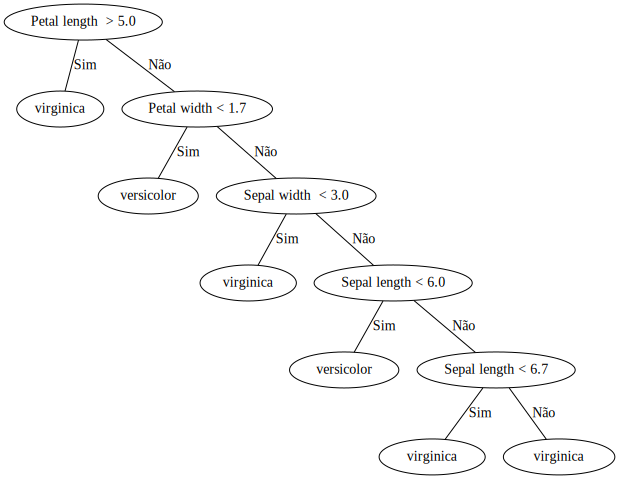

In [ ]:
from graphviz import Graph as Graphviz

gv = Graphviz()
node = tree
last = None
i = 0
while True:
  curr = node['attr'] + (' < ' if node['is_min'] else ' > ') + str(node['cut'])
  if last:
    gv.edge(last, curr, 'Não')
  last = curr
  gv.edge(last, species[node['class']-1] + i*' ', 'Sim')
  i += 1
  if type(node['next']) != dict:
    gv.edge(last, species[node['class']-1] + i*' ', 'Não')
    break
  node = node['next']

gv

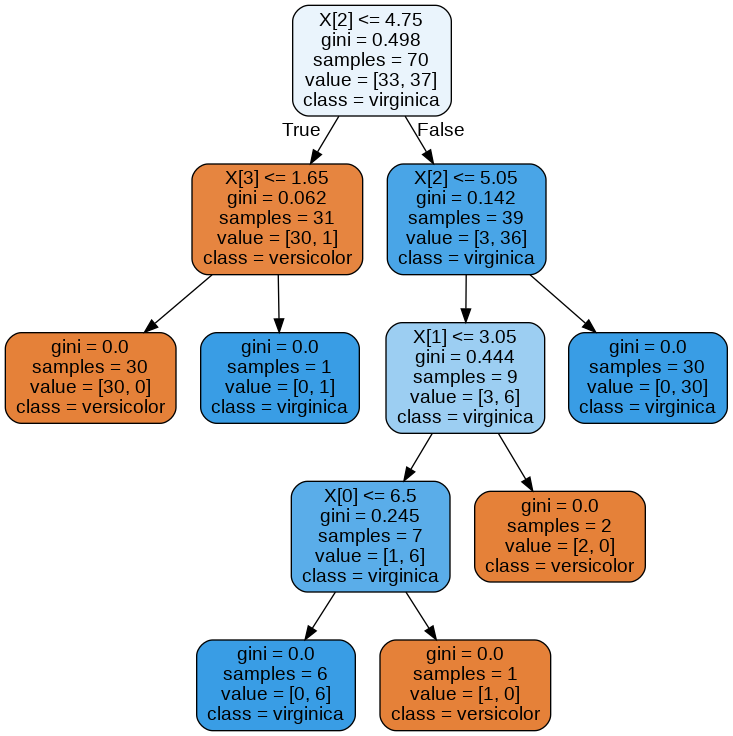

In [ ]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, class_names=species)
Image(pydotplus.graph_from_dot_data(dot_data.getvalue()).create_png())

Podemos perceber que em praticamente todas as vezes nosso árvore possui menos níveis, mesmo a da biblioteca sendo mais balanceada a eficiência do tempo de execução da nossa é bem inferior.

## d)

In [ ]:
matrix = confusion_matrix(iris_result.Species, iris_result.result_tree)

print('Acurácia:', np.trace(matrix) / len(iris_result) * 100, '%\n')
print('Total Erros:', (iris_result.Species != iris_result.result_tree).sum(), '\n')

print('Matriz de Confusão:')
pd.DataFrame(matrix, species, species)

Acurácia: 93.33333333333333 %

Total Erros: 2 

Matriz de Confusão:


,versicolor,virginica
versicolor,15,2
virginica,0,13


## e)

Como o conjunto de treino é aleatório, varia um pouco, mas na grande maioria da vezes, a nossa árvore tem uma maio acurácia e consequentemente manor número de erros.

# Question 3

## a)

In [ ]:
print('Conjunto de Treino Iris.........>', iris_training.to_numpy().shape)
print('Conjunto de Teste Iris..........>', iris_test.to_numpy().shape)
print('Classes do conjunto...>', pd.unique(iris_test['Species']))

Conjunto de Treino Iris.........> (70, 5)
Conjunto de Teste Iris..........> (30, 5)
Classes do conjunto...> [2. 1.]


## b)

In [ ]:
classifier = BaggingClassifier(n_estimators=5, random_state=42)
classifier.fit(iris_training.iloc[:, :-1], iris_training.Species)

bagging_result = classifier.predict(iris_test.iloc[:, :-1])

iris_result = iris_test.copy()
iris_result['result_bagging'] = bagging_result
iris_result

1,Sepal length,Sepal width,Petal length,Petal width,Species,result_bagging
57,7.3,2.9,6.3,1.8,2.0,2.0
37,6.3,2.3,4.4,1.3,1.0,1.0
26,6.8,2.8,4.8,1.4,1.0,1.0
47,6.2,2.9,4.3,1.3,1.0,1.0
67,7.7,3.8,6.7,2.2,2.0,2.0
72,7.7,2.8,6.7,2.0,2.0,2.0
22,6.3,2.5,4.9,1.5,1.0,1.0
4,6.5,2.8,4.6,1.5,1.0,1.0
69,6.0,2.2,5.0,1.5,2.0,1.0
8,6.6,2.9,4.6,1.3,1.0,1.0


## c)

In [ ]:
bagging_in_training = classifier.predict(iris_training.iloc[:, :-1])

matrix = confusion_matrix(bagging_in_training, iris_training.Species)

print('Acurácia:', np.trace(matrix) / len(iris_training) * 100, '%\n')
print('Total Erros:', (bagging_in_training != iris_training.Species).sum(), '\n')

print('Matriz de Confusão:')
pd.DataFrame(matrix, species, species)

Acurácia: 98.57142857142858 %

Total Erros: 1 

Matriz de Confusão:


,versicolor,virginica
versicolor,32,0
virginica,1,37


Podemos perceber que em uma parte considerável das vezes, a acurácia do Bagging no próprio conjunto de treino não atinge os 100%, o que não acontece na árvore que geramos.

## d)

In [ ]:
matrix = confusion_matrix(bagging_result, iris_test.Species)

print('Acurácia:', np.trace(matrix) / len(iris_result) * 100, '%\n')
print('Total Erros:', (bagging_result != iris_test.Species).sum(), '\n')

print('Matriz de Confusão:')
pd.DataFrame(matrix, species, species)

Acurácia: 93.33333333333333 %

Total Erros: 2 

Matriz de Confusão:


,versicolor,virginica
versicolor,16,1
virginica,1,12


Como dito anteriormente a aleatoriedade faz com que os valores mudem um pouco a cada execução, mas em geral os valores são bem próximos aos das questões 1 e 2, e até iguais na maioria das vezes. Com isto podemos perceber que o Bagging não trouxe muito ganho para esse caso. Mas vale salientar que mesmo possuindo a mesma acurácia, as vezes o Bagging gera erros diferentes das questões anteriores, por exemplo, nas questões anteriores existem 2 erros em Virginica mas aqui um desses erros está na outra classe.

# Question 4

## Separação dos conjuntos de treino e teste


In [ ]:
X = diabetes.iloc[:, diabetes.columns != 'Diagnóstico'].to_numpy()
y = diabetes['Diagnóstico'].to_numpy()

print('Atributos....>', X.shape)
print('Classes......>', y.shape)


X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2)

print('\n')
print('Atributos de Treino..>', X_train.shape)
print('Atributos de Teste...>', X_test.shape)
print('Classes de Treino....>', y_train.shape)
print('Classes de Teste.....>', y_train.shape)


Atributos....> (768, 8)
Classes......> (768,)


Atributos de Treino..> (614, 8)
Atributos de Teste...> (154, 8)
Classes de Treino....> (614,)
Classes de Teste.....> (614,)


In [28]:
diabetes_test = pd.DataFrame(data=np.concatenate((X_test, y_test.reshape(-1,1)), axis=1), columns=diabetes.columns)
diabetes_test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Gravidez,154.0,3.948052,3.591552,0.0,1.000,3.0,6.00,15.0
Glicose,154.0,120.837662,33.670155,0.0,100.000,117.0,141.50,197.0
Pressão,154.0,67.759740,22.782018,0.0,62.500,72.0,80.00,106.0
Pele,154.0,19.577922,16.345847,0.0,0.000,22.0,32.00,63.0
Insulina,154.0,84.318182,141.595424,0.0,0.000,0.0,115.00,846.0
Massa Corpórea,154.0,32.069481,7.999807,0.0,26.425,31.6,36.60,59.4
Genealogia,154.0,0.450000,0.333578,0.1,0.200,0.3,0.60,2.4
Idade,154.0,32.740260,11.487877,21.0,23.000,28.0,39.75,68.0
Diagnóstico,154.0,1.350649,0.478730,1.0,1.000,1.0,2.00,2.0


In [ ]:
diabetes_treino = pd.DataFrame(data=np.concatenate((X_train, y_train.reshape(-1,1)), axis=1), columns=diabetes.columns)
diabetes_treino.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Gravidez,614.0,3.819218,3.314148,0.0,1.0,3.0,6.0,17.0
Glicose,614.0,120.908795,31.561093,0.0,99.0,117.0,140.0,199.0
Pressão,614.0,69.442997,18.402581,0.0,62.5,72.0,80.0,122.0
Pele,614.0,20.776873,15.856433,0.0,0.0,23.0,32.0,99.0
Insulina,614.0,78.666124,107.736572,0.0,0.0,40.5,130.0,744.0
Massa Corpórea,614.0,31.973290,7.861364,0.0,27.5,32.3,36.5,67.1
Genealogia,614.0,0.477850,0.332077,0.1,0.2,0.4,0.6,2.3
Idade,614.0,33.366450,11.833438,21.0,24.0,29.0,41.0,81.0
Diagnóstico,614.0,1.348534,0.476895,1.0,1.0,1.0,2.0,2.0


## Análise visual da distribuição de cada Atributo do conjunto de treino

In [ ]:
def stats(variable):
  var_dic = {}
  var_dic['Mean'] = np.mean(variable)
  var_dic['Median'] = np.median(variable)
  var_dic['Variance'] = np.var(variable)
  var_dic['Std'] = np.std(variable)
  return var_dic

def describe_custom(variable, print_data=True):
  dic = stats(variable)
  
  fig, ax = plt.subplots(figsize=(8,7))
  ax = sn.distplot(variable, bins=15)
  ax.set_title(variable.name)
  ax.set_xlabel('')
  plt.show()
  if print_data == True:
    for key in dic:
      print('{}: '.format(key) + '{}'.format(dic[key]))
    print('\n')

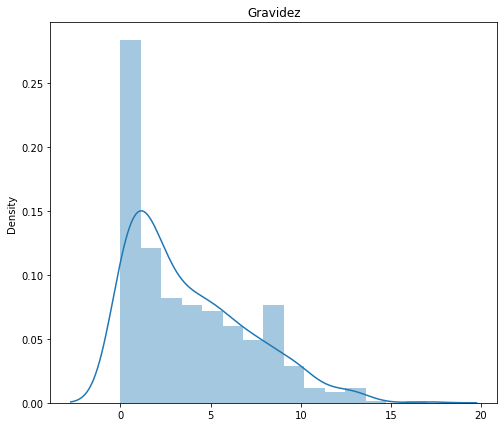

Mean: 3.8192182410423454
Median: 3.0
Variance: 10.965689291133055
Std: 3.3114482165863706




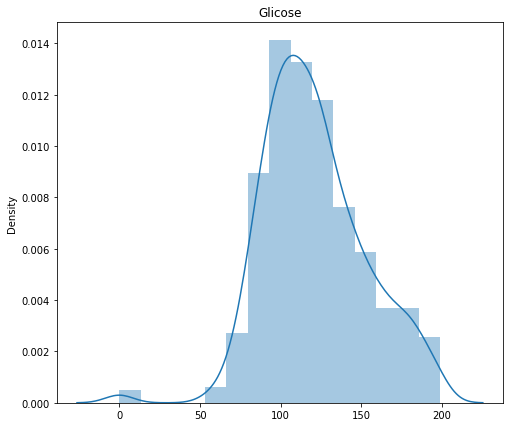

Mean: 120.90879478827361
Median: 117.0
Variance: 994.4802809578883
Std: 31.535381414498357




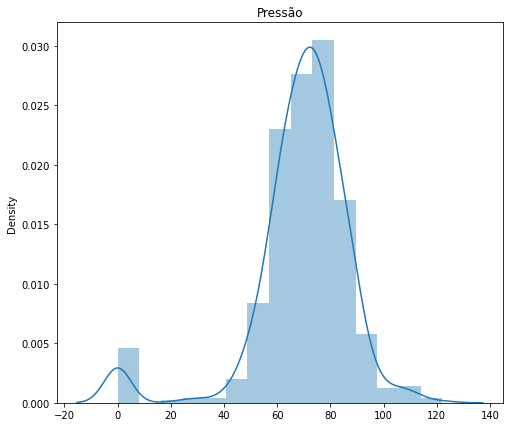

Mean: 69.44299674267101
Median: 72.0
Variance: 338.1034281530839
Std: 18.387588970636795




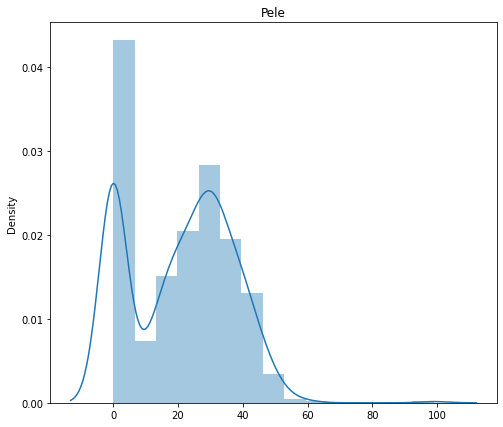

Mean: 20.77687296416938
Median: 23.0
Variance: 251.01698957018147
Std: 15.843515694762367




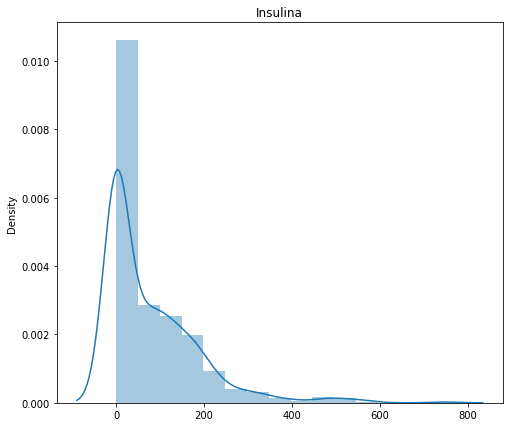

Mean: 78.66612377850163
Median: 40.5
Variance: 11588.264748167074
Std: 107.6488028180856




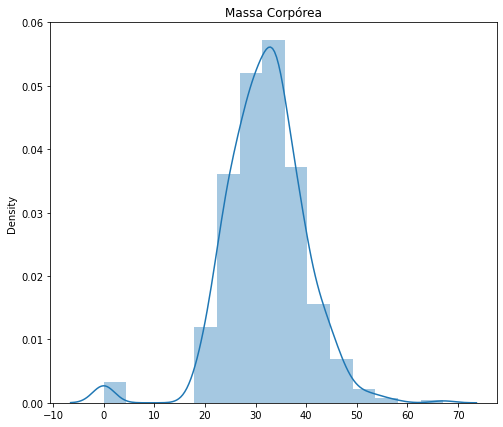

Mean: 31.973289902280115
Median: 32.3
Variance: 61.70039406253645
Std: 7.854959838378326




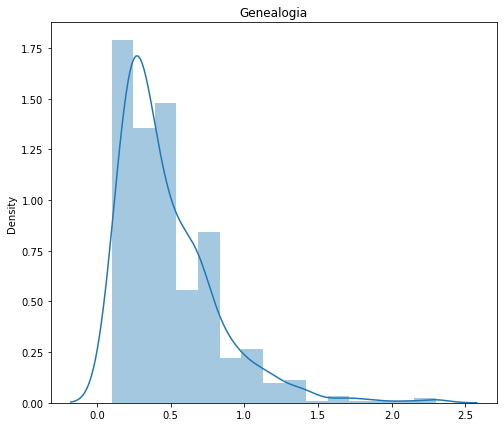

Mean: 0.477850162866449
Median: 0.4
Variance: 0.11009570393319884
Std: 0.33180672677508943




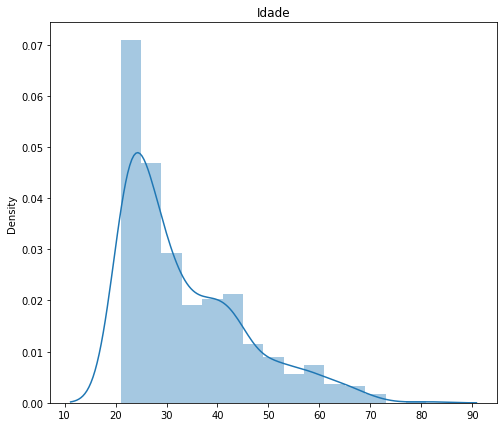

Mean: 33.36644951140065
Median: 29.0
Variance: 139.80219684028472
Std: 11.823797902547419




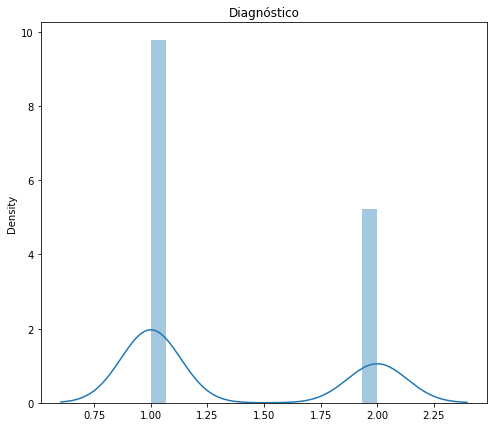

Mean: 1.3485342019543973
Median: 1.0
Variance: 0.22705811202240803
Std: 0.47650615108559513




In [ ]:
for column in diabetes_treino.columns:
  describe_custom(diabetes_treino[column])

## Normalização do conjunto de treino

In [ ]:
z_scaler = preprocessing.StandardScaler()

diabetes_treino_norm = pd.DataFrame(z_scaler.fit_transform(diabetes_treino.to_numpy()), columns=diabetes_treino.columns)
diabetes_treino_norm['Diagnóstico'] = diabetes_treino_norm['Diagnóstico']
diabetes_treino_norm.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Gravidez,614.0,-1.871467e-17,1.000815,-1.153338,-0.851355,-0.247390,0.658558,3.980368
Glicose,614.0,1.647253e-16,1.000815,-3.834068,-0.694737,-0.123950,0.605390,2.476304
Pressão,614.0,-1.927521e-16,1.000815,-3.776623,-0.377591,0.139061,0.574137,2.858287
Pele,614.0,2.721312e-17,1.000815,-1.311380,-1.311380,0.140318,0.708374,4.937233
Insulina,614.0,3.959916e-17,1.000815,-0.730766,-0.730766,-0.354543,0.476864,6.180597
Massa Corpórea,614.0,1.954011e-15,1.000815,-4.070459,-0.569486,0.041593,0.576287,4.471915
Genealogia,614.0,1.509289e-15,1.000815,-1.138766,-0.837386,-0.234625,0.368136,5.491600
Idade,614.0,-9.890749e-17,1.000815,-1.045895,-0.792169,-0.369293,0.645609,4.028617
Diagnóstico,614.0,1.728621e-16,1.000815,-0.731437,-0.731437,-0.731437,1.367172,1.367172


## Análise de Correlação e Covariancia do Conjunto de treino

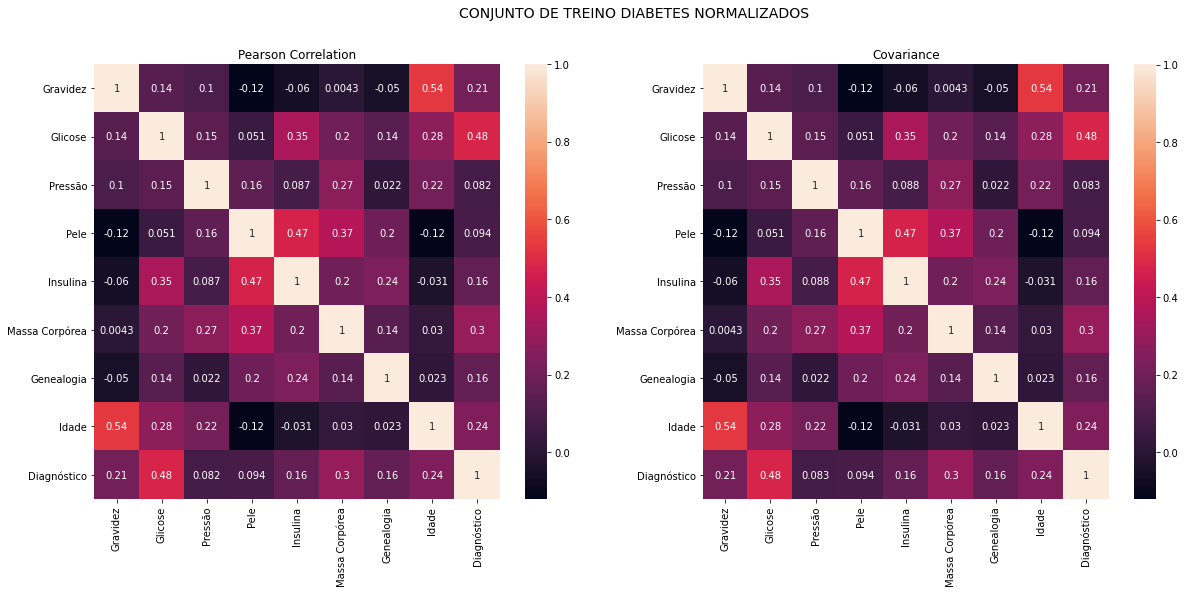

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(20,8))
fig.suptitle('CONJUNTO DE TREINO DIABETES NORMALIZADOS', fontsize=14)

ax = sn.heatmap(diabetes_treino_norm.corr(method='pearson'),ax=ax[0], annot=True)
ax.set_title('Pearson Correlation')

ax = sn.heatmap(diabetes_treino_norm.cov(), annot=True)
ax.set_title('Covariance')

plt.show()

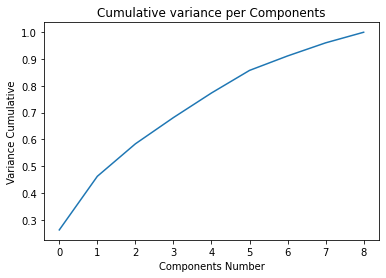

In [ ]:
pca = PCA()
pca.fit(diabetes_treino_norm)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Components Number')
plt.ylabel('Variance Cumulative')
plt.title('Cumulative variance per Components')
plt.show()

## Salvando os arquvios de Treino e Teste


In [30]:
diabetes_treino.to_csv('diabetes_treino', index=False)
diabetes_test.to_csv('diabetes_teste', index=False)